In [2]:
import pandas as pd

# Load datasets
mental_illness_prevalence = pd.read_csv('C:\\Users\\USER\\Videos\\pscotherapy\\1- mental-illnesses-prevalence.csv')
burden_disease = pd.read_csv('C:\\Users\\USER\\Videos\\pscotherapy\\2- burden-disease-from-each-mental-illness(1).csv')
major_depression_prevalence = pd.read_csv('C:\\Users\\USER\\Videos\\pscotherapy\\3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv')
mental_illnesses_coverage = pd.read_csv('C:\\Users\\USER\\Videos\\pscotherapy\\4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv')
anxiety_disorders_treatment_gap = pd.read_csv('C:\\Users\\USER\\Videos\\pscotherapy\\5- anxiety-disorders-treatment-gap.csv')
depressive_symptoms_us_population = pd.read_csv('C:\\Users\\USER\\Videos\\pscotherapy\\6- depressive-symptoms-across-us-population.csv')
countries_with_primary_data = pd.read_csv('C:\\Users\\USER\\Videos\\pscotherapy\\7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv')

# Display the first few rows of each dataset
print(mental_illness_prevalence.head())
print(burden_disease.head())
print(major_depression_prevalence.head())
print(mental_illnesses_coverage.head())
print(anxiety_disorders_treatment_gap.head())
print(depressive_symptoms_us_population.head())
print(countries_with_primary_data.head())

# Basic data cleaning
def preprocess_data(df):
    df.dropna(inplace=True)  # Remove missing values
    df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace from column names
    return df

mental_illness_prevalence = preprocess_data(mental_illness_prevalence)
burden_disease = preprocess_data(burden_disease)
major_depression_prevalence = preprocess_data(major_depression_prevalence)
mental_illnesses_coverage = preprocess_data(mental_illnesses_coverage)
anxiety_disorders_treatment_gap = preprocess_data(anxiety_disorders_treatment_gap)
depressive_symptoms_us_population = preprocess_data(depressive_symptoms_us_population)
countries_with_primary_data = preprocess_data(countries_with_primary_data)


        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                        

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


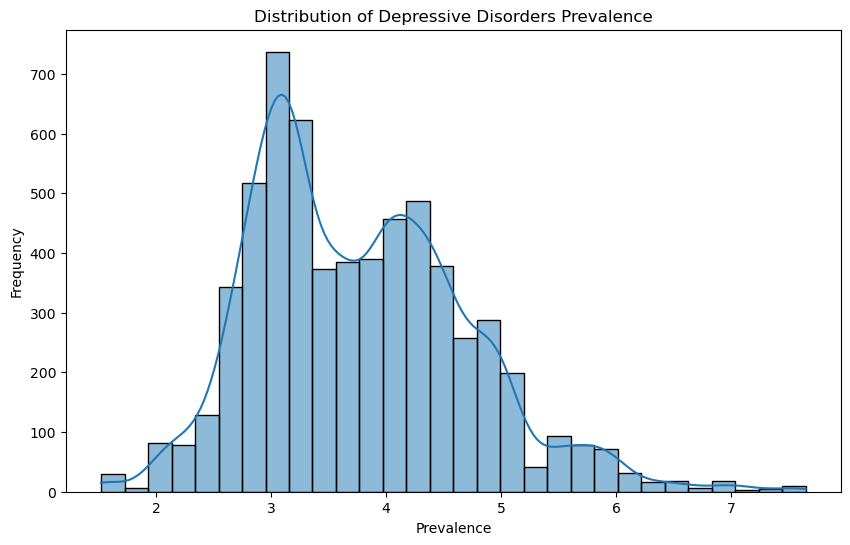

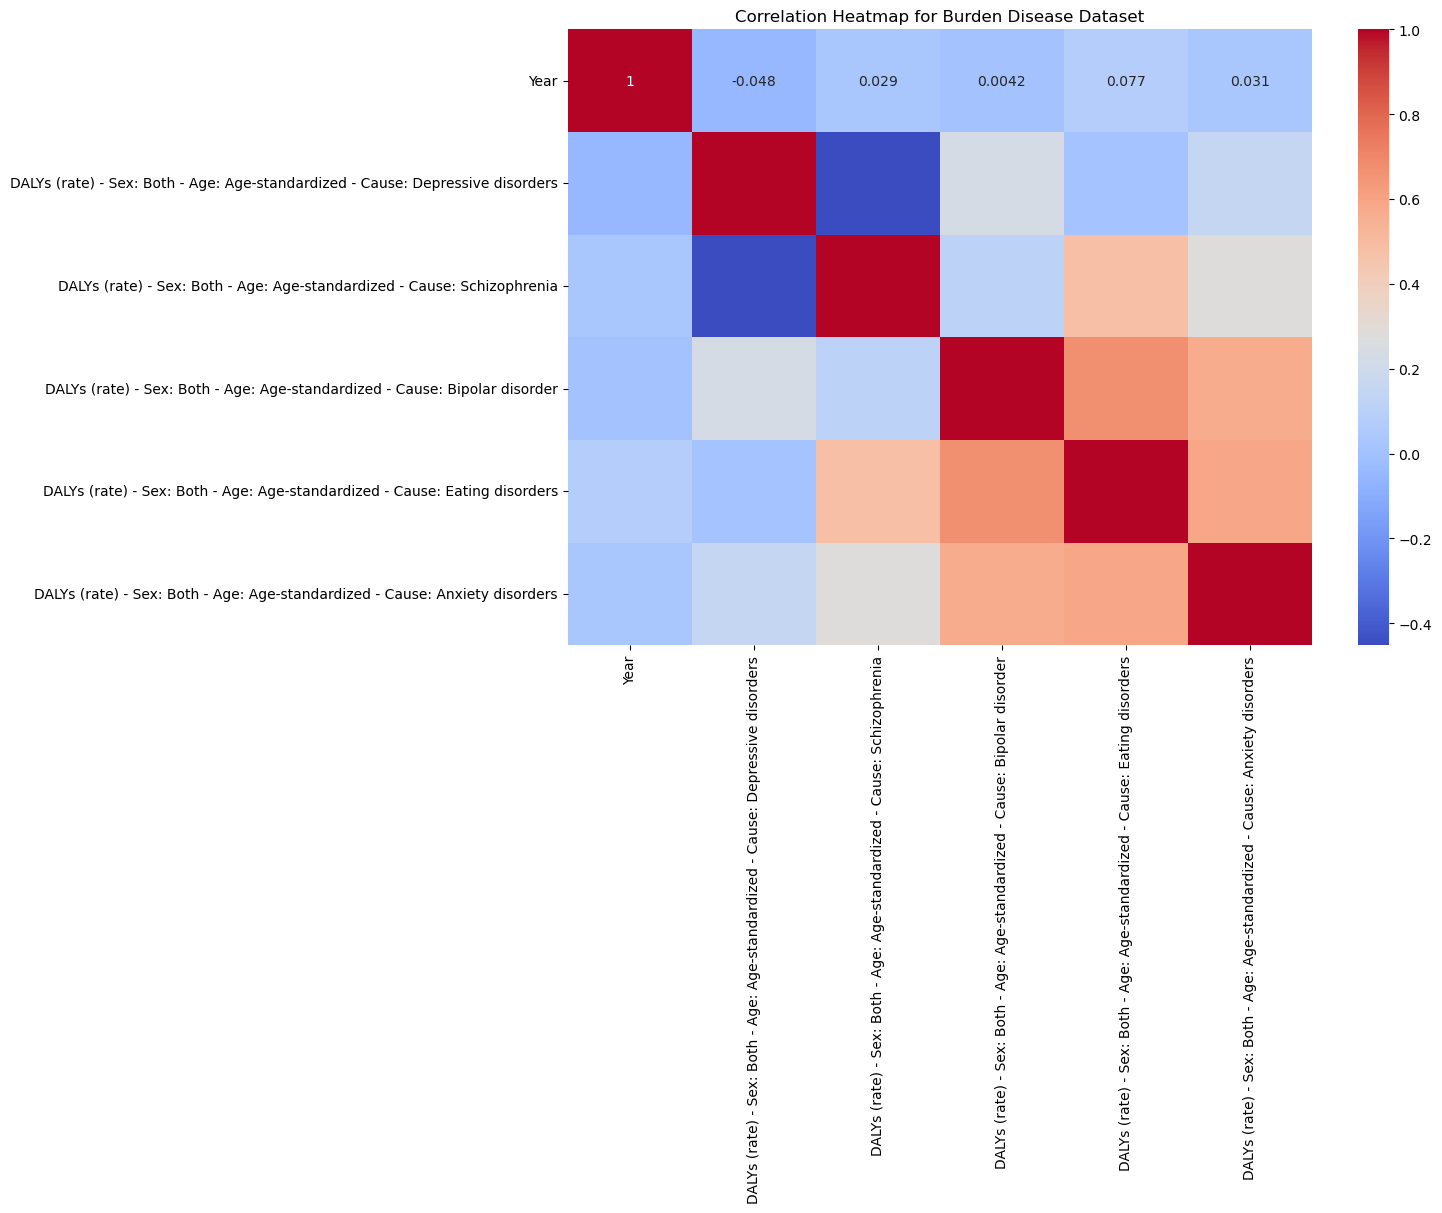

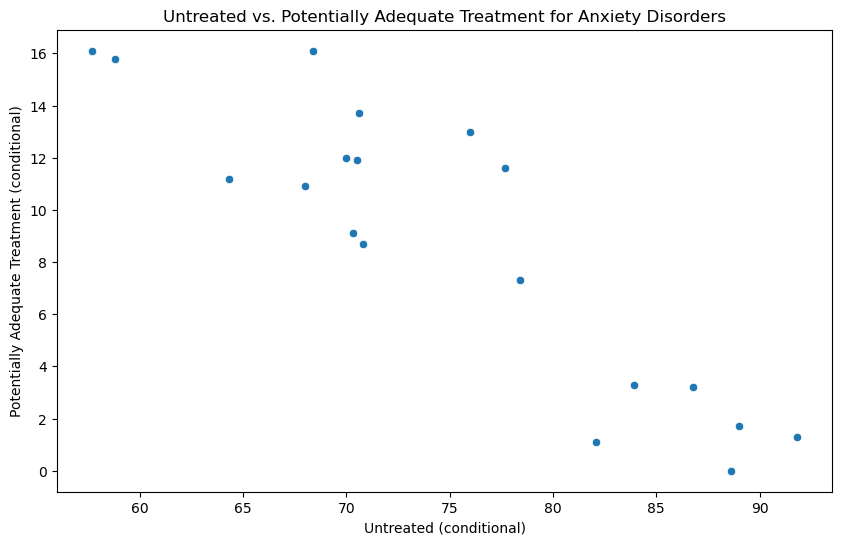

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of Depressive disorders prevalence
plt.figure(figsize=(10, 6))
sns.histplot(mental_illness_prevalence['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], bins=30, kde=True)
plt.title('Distribution of Depressive Disorders Prevalence')
plt.xlabel('Prevalence')
plt.ylabel('Frequency')
plt.show()

# Select only numeric columns for the correlation heatmap
numeric_columns = burden_disease.select_dtypes(include='number').columns

# Correlation heatmap for burden disease dataset
plt.figure(figsize=(12, 8))
sns.heatmap(burden_disease[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Burden Disease Dataset')
plt.show()

# Scatter plot of untreated vs. potentially adequate treatment for anxiety disorders
plt.figure(figsize=(10, 6))
sns.scatterplot(x=anxiety_disorders_treatment_gap['Untreated, conditional'], y=anxiety_disorders_treatment_gap['Potentially adequate treatment, conditional'])
plt.title('Untreated vs. Potentially Adequate Treatment for Anxiety Disorders')
plt.xlabel('Untreated (conditional)')
plt.ylabel('Potentially Adequate Treatment (conditional)')
plt.show()


Mean Squared Error: 0.9341311972497596
R^2 Score: 0.0007967201210089536


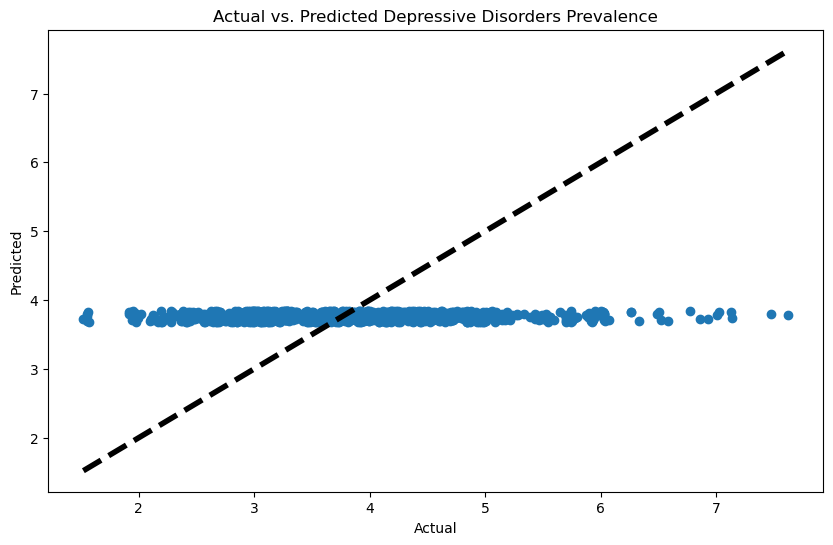

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select numeric features and target variable
features = ['Year']
target = 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'

# Preprocessing: Convert categorical variables to numeric
mental_illness_prevalence = pd.get_dummies(mental_illness_prevalence, columns=['Entity'])

# Split data into training and testing sets
X = mental_illness_prevalence[features]
y = mental_illness_prevalence[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Depressive Disorders Prevalence')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# List of illnesses to predict
illnesses = [
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'
]

# Display the column names to identify the correct entity column name
print("mental_illness_prevalence columns:", mental_illness_prevalence.columns)

# Update the column name based on the actual column name
entity_column = 'Entity'  # Change this based on the actual column name

# Preprocessing: Convert categorical variables to numeric
mental_illness_prevalence = pd.get_dummies(mental_illness_prevalence, columns=[entity_column])

# Select numeric features
features = ['Year']

# Function to train and evaluate the model for each illness
def train_and_evaluate(illness):
    X = mental_illness_prevalence[features]
    y = mental_illness_prevalence[illness]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Illness: {illness}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}\n')
    
    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs. Predicted for {illness}')
    plt.show()

# Train and evaluate the model for each illness
for illness in illnesses:
    train_and_evaluate(illness)


mental_illness_prevalence columns: Index(['Code', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Entity_Afghanistan', 'Entity_Albania', 'Entity_Algeria',
       ...
       'Entity_United States Virgin Islands', 'Entity_Uruguay',
       'Entity_Uzbekistan', 'Entity_Vanuatu', 'Entity_Venezuela',
       'Entity_Vietnam', 'Entity_World', 'Entity_Yemen', 'Entity_Zambia',
       'Entity_Zimbabwe'],
      dtype='object', length=212)


KeyError: "None of [Index(['Entity'], dtype='object')] are in the [columns]"